In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Data
data = pd.read_csv('DATA_BIRDS.csv')
data.shape

(2555, 13)

In [3]:
data.head()

,Time,Species Name,Population,Habitat Area (km²),Migration,Reproduction Rate,Predation Risk,Environmental Threat,Season,Region,Forest Type,Urbanization,Extinction Risk
0,2018-01-07,Chào mào,120000,329,Có,1.75,Thấp,1,Hạ,Đồng bằng,Nhiệt đới,59,Nguy cơ trung bình
1,2018-01-07,Yến núi,10000,461,Có,1.48,Cao,9,Thu,Trung du,Rừng ngập mặn,70,Nguy cơ trung bình
2,2018-01-07,Cú mèo,50000,60,Không,3.38,Cao,9,Xuân,Trung du,Ôn đới,59,Nguy cơ cao
3,2018-01-07,Cắt nhỏ bụng vàng,40000,299,Có,1.79,Thấp,1,Hạ,Đồng bằng,Rừng ngập mặn,66,Nguy cơ thấp
4,2018-01-07,Công,20000,497,Không,1.33,Trung bình,4,Xuân,Đồi núi,Rừng ngập mặn,15,Nguy cơ thấp


In [4]:
data.describe()

,Population,Habitat Area (km²),Reproduction Rate,Environmental Threat,Urbanization
count,2555.000000,2555.000000,2555.000000,2555.000000,2555.000000
mean,83047.073581,255.075930,2.998517,5.486497,49.221526
std,72075.180333,142.014607,1.174193,2.837430,28.873272
min,8951.000000,10.000000,1.010000,1.000000,0.000000
25%,19214.500000,128.500000,1.955000,3.000000,25.000000
50%,42072.000000,257.000000,2.990000,5.000000,49.000000
75%,149338.500000,377.000000,4.020000,8.000000,74.000000
max,271937.000000,500.000000,5.000000,10.000000,100.000000


In [5]:
data.dtypes

Time                     object
Species Name             object
Population                int64
Habitat Area (km²)        int64
Migration                object
Reproduction Rate       float64
Predation Risk           object
Environmental Threat      int64
Season                   object
Region                   object
Forest Type              object
Urbanization              int64
Extinction Risk          object
dtype: object

In [6]:
data.columns

Index(['Time', 'Species Name', 'Population', 'Habitat Area (km²)', 'Migration',
       'Reproduction Rate', 'Predation Risk', 'Environmental Threat', 'Season',
       'Region', 'Forest Type', 'Urbanization', 'Extinction Risk'],
      dtype='object')

In [7]:
# Drop Unnecessary Columns
# Season is not necessary because we have the Time data columns, from this we can get the season

data = data.drop(['Season'], axis=1)

In [8]:
# Handle Missing Values
data.isna().sum()

Time                    0
Species Name            0
Population              0
Habitat Area (km²)      0
Migration               0
Reproduction Rate       0
Predation Risk          0
Environmental Threat    0
Region                  0
Forest Type             0
Urbanization            0
Extinction Risk         0
dtype: int64

In [9]:
data = data.dropna()
data.shape

(2555, 12)

In [10]:
# Convert Time to Datetime

data['Time'] = pd.to_datetime(data['Time'])
data['Time']

0      2018-01-07
1      2018-01-07
2      2018-01-07
3      2018-01-07
4      2018-01-07
          ...    
2550   2024-12-29
2551   2024-12-29
2552   2024-12-29
2553   2024-12-29
2554   2024-12-29
Name: Time, Length: 2555, dtype: datetime64[ns]

In [11]:
# Extract Year, Month, Day, Hour, Minute from Time
data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.month
data['Day'] = data['Time'].dt.day
data

,Time,Species Name,Population,Habitat Area (km²),Migration,Reproduction Rate,Predation Risk,Environmental Threat,Region,Forest Type,Urbanization,Extinction Risk,Year,Month,Day
0,2018-01-07,Chào mào,120000,329,Có,1.75,Thấp,1,Đồng bằng,Nhiệt đới,59,Nguy cơ trung bình,2018,1,7
1,2018-01-07,Yến núi,10000,461,Có,1.48,Cao,9,Trung du,Rừng ngập mặn,70,Nguy cơ trung bình,2018,1,7
2,2018-01-07,Cú mèo,50000,60,Không,3.38,Cao,9,Trung du,Ôn đới,59,Nguy cơ cao,2018,1,7
3,2018-01-07,Cắt nhỏ bụng vàng,40000,299,Có,1.79,Thấp,1,Đồng bằng,Rừng ngập mặn,66,Nguy cơ thấp,2018,1,7
4,2018-01-07,Công,20000,497,Không,1.33,Trung bình,4,Đồi núi,Rừng ngập mặn,15,Nguy cơ thấp,2018,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,2024-12-29,Cu Gáy,215821,75,Có,4.68,Cao,4,Đồng bằng,Rừng ngập mặn,23,Nguy cơ thấp,2024,12,29
2551,2024-12-29,Công,13895,17,Có,4.59,Trung bình,8,Đồng bằng,Rừng ngập mặn,20,Nguy cơ cao,2024,12,29
2552,2024-12-29,Cắt nhỏ bụng vàng,16833,431,Không,2.65,Thấp,10,Trung du,Rừng ngập mặn,47,Nguy cơ thấp,2024,12,29
2553,2024-12-29,Yến núi,11995,433,Không,4.23,Thấp,3,Trung du,Ôn đới,99,Nguy cơ thấp,2024,12,29


In [12]:
# Use Prophet for Time Series Forecasting

#Encode the Species Name to find number of unique species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species Name'] = le.fit_transform(data['Species Name'])

data['Species Name'].nunique()

# There are 7 unique species in the dataset
species_labels = le.classes_

# Print the labels of the species names
for i in range(7):
    print(f"Label {i}: {species_labels[i]}")

Label 0: Chào mào
Label 1: Chích chòe
Label 2: Cu Gáy
Label 3: Công
Label 4: Cú mèo
Label 5: Cắt nhỏ bụng vàng
Label 6: Yến núi


In [13]:
#!pip install prophet

In [14]:
#Create a new dataframe with the required columns
data_prophet = data[['Time', 'Species Name', 'Population']]

#Crete data for each Species Name
list_species = data_prophet['Species Name'].unique()

data_prophet_Chaomao = data_prophet[data_prophet['Species Name'] == 0]
data_prophet_Chichchoe = data_prophet[data_prophet['Species Name'] == 1]
data_prophet_CuGay = data_prophet[data_prophet['Species Name'] == 2]
data_prophet_Cong = data_prophet[data_prophet['Species Name'] == 3]
data_prophet_Cumeo = data_prophet[data_prophet['Species Name'] == 4]
data_prophet_Catnho = data_prophet[data_prophet['Species Name'] == 5]
data_prophet_Yenui = data_prophet[data_prophet['Species Name'] == 6]


data_prophet_Chaomao = data_prophet_Chaomao.rename(columns={'Time': 'ds', 'Population': 'y'})
data_prophet_Chichchoe = data_prophet_Chichchoe.rename(columns={'Time': 'ds', 'Population': 'y'})
data_prophet_CuGay = data_prophet_CuGay.rename(columns={'Time': 'ds', 'Population': 'y'})
data_prophet_Cong = data_prophet_Cong.rename(columns={'Time': 'ds', 'Population': 'y'})
data_prophet_Cumeo = data_prophet_Cumeo.rename(columns={'Time': 'ds', 'Population': 'y'})
data_prophet_Catnho = data_prophet_Catnho.rename(columns={'Time': 'ds', 'Population': 'y'})
data_prophet_Yenui = data_prophet_Yenui.rename(columns={'Time': 'ds', 'Population': 'y'})


data_prophet_Chaomao

,ds,Species Name,y
0,2018-01-07,0,120000
12,2018-01-14,0,120119
14,2018-01-21,0,120240
21,2018-01-28,0,120360
33,2018-02-04,0,120480
...,...,...,...
2524,2024-12-01,0,269503
2530,2024-12-08,0,270110
2537,2024-12-15,0,270717
2547,2024-12-22,0,271326


In [15]:
#Drop the Species Name column to predict the population

data_prophet_Chaomao = data_prophet_Chaomao.drop(['Species Name'], axis=1)
data_prophet_Chichchoe = data_prophet_Chichchoe.drop(['Species Name'], axis=1)
data_prophet_CuGay = data_prophet_CuGay.drop(['Species Name'], axis=1)
data_prophet_Cong = data_prophet_Cong.drop(['Species Name'], axis=1)
data_prophet_Cumeo = data_prophet_Cumeo.drop(['Species Name'], axis=1)
data_prophet_Catnho = data_prophet_Catnho.drop(['Species Name'], axis=1)
data_prophet_Yenui = data_prophet_Yenui.drop(['Species Name'], axis=1)

data_prophet_Chaomao

,ds,y
0,2018-01-07,120000
12,2018-01-14,120119
14,2018-01-21,120240
21,2018-01-28,120360
33,2018-02-04,120480
...,...,...
2524,2024-12-01,269503
2530,2024-12-08,270110
2537,2024-12-15,270717
2547,2024-12-22,271326


In [16]:
from prophet import Prophet

# Create a model for each species_labels
model_Chaomao = Prophet()
model_Chichchoe = Prophet()
model_CuGay = Prophet()
model_Cong = Prophet()
model_Cumeo = Prophet()
model_Catnho = Prophet()
model_Yenui = Prophet()

In [17]:
# Fit the model for each species_labels

model_Chaomao.fit(data_prophet_Chaomao)

23:26:50 - cmdstanpy - INFO - Chain [1] start processing
23:26:50 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
prediction_Chaomao = model_Chaomao.make_future_dataframe(periods=730)
prediction_Chaomao

,ds
0,2018-01-07
1,2018-01-14
2,2018-01-21
3,2018-01-28
4,2018-02-04
...,...
1090,2026-12-25
1091,2026-12-26
1092,2026-12-27
1093,2026-12-28


In [19]:
prediction_Chaomao = model_Chaomao.predict(prediction_Chaomao)
prediction_Chaomao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2026-12-25,410557.166574,366723.074219,449432.507478
1091,2026-12-26,411097.735410,367737.535211,450742.608724
1092,2026-12-27,411672.726365,369409.145639,450372.008805
1093,2026-12-28,412278.489558,369770.708370,450791.413676
1094,2026-12-29,412910.789797,370152.755388,451960.522931


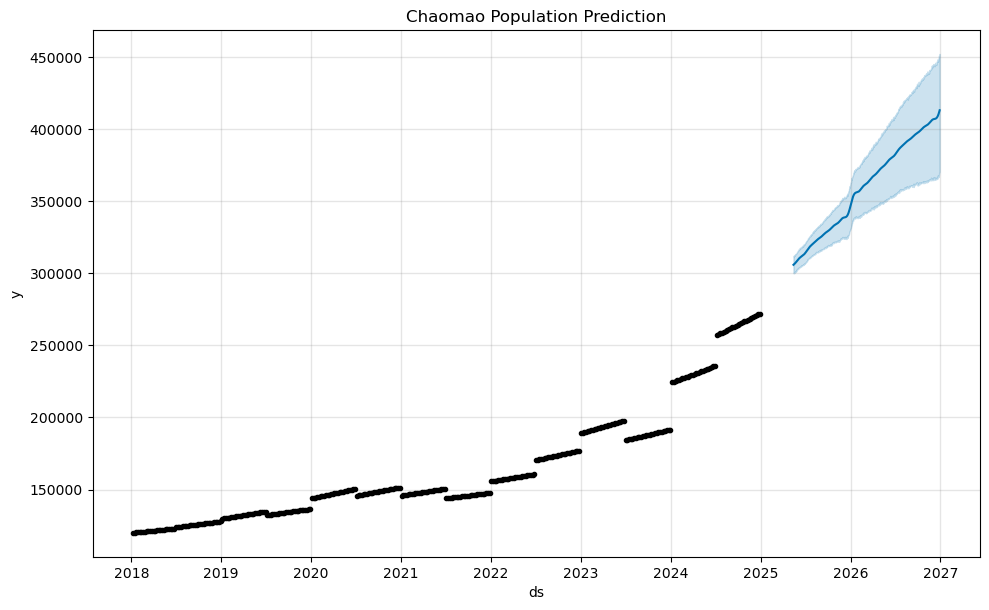

In [20]:
#Plot the prediction from 2024 to 2026
model_Chaomao.plot(prediction_Chaomao[500:])
plt.title('Chaomao Population Prediction')
plt.show()

In [21]:
model_Chichchoe.fit(data_prophet_Chichchoe)

23:26:51 - cmdstanpy - INFO - Chain [1] start processing
23:26:51 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
prediction_Chichchoe = model_Chichchoe.make_future_dataframe(periods=730)
prediction_Chichchoe = model_Chichchoe.predict(prediction_Chichchoe)
prediction_Chichchoe[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2026-12-25,323762.544937,305986.449325,340758.612811
1091,2026-12-26,324086.371777,307360.919072,341522.879545
1092,2026-12-27,324427.240290,307738.046174,341337.346470
1093,2026-12-28,324783.083087,306929.322183,342185.022029
1094,2026-12-29,325151.546992,307533.845879,342196.371957


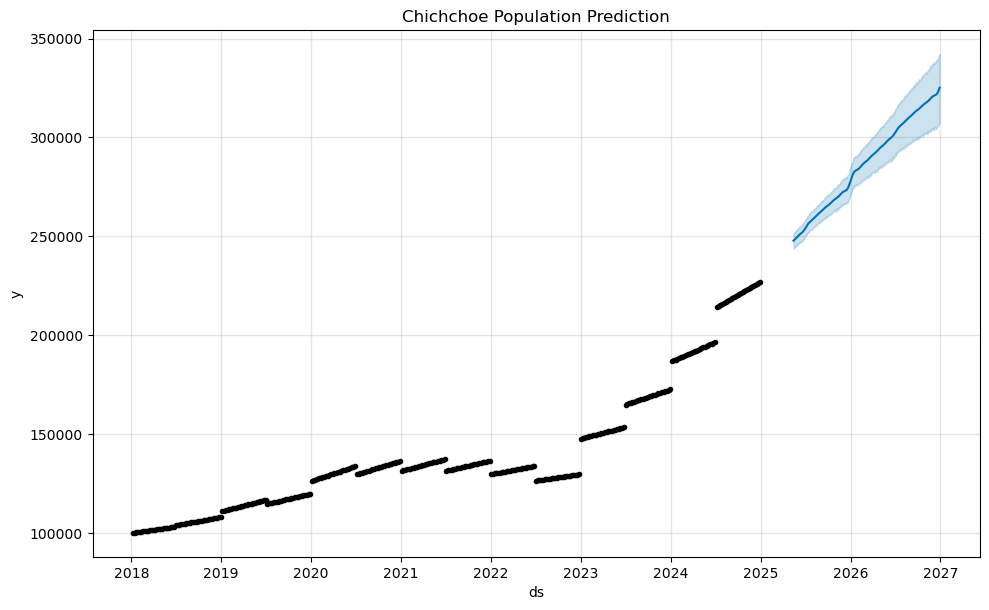

In [23]:
#Plot the prediction from 2024 to 2026
model_Chichchoe.plot(prediction_Chichchoe[500:])
plt.title('Chichchoe Population Prediction')
plt.show()

In [24]:
model_CuGay.fit(data_prophet_CuGay)

23:26:51 - cmdstanpy - INFO - Chain [1] start processing
23:26:51 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
prediction_CuGay = model_CuGay.make_future_dataframe(periods=730)
prediction_CuGay = model_CuGay.predict(prediction_CuGay)
prediction_CuGay[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2026-12-25,211260.937167,195025.848503,225865.058261
1091,2026-12-26,211165.917407,194713.938615,226945.139021
1092,2026-12-27,211073.285472,195187.854570,226680.448169
1093,2026-12-28,210984.475919,195695.049642,225998.310463
1094,2026-12-29,210900.836269,195387.431376,227314.314104


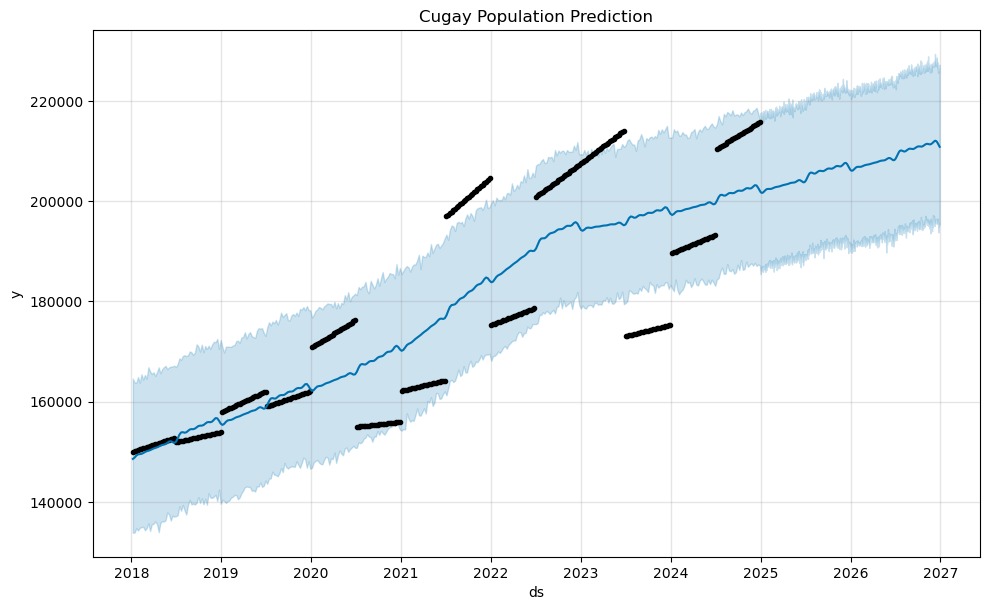

In [26]:
#Plot the prediction from 2024 to 2026
model_CuGay.plot(prediction_CuGay)
plt.title('Cugay Population Prediction')
plt.show()

In [27]:
model_Cong.fit(data_prophet_Cong)

23:26:51 - cmdstanpy - INFO - Chain [1] start processing
23:26:51 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
prediction_Cong = model_Cong.make_future_dataframe(periods=730)
prediction_Cong = model_Cong.predict(prediction_Cong)
prediction_Cong[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2026-12-25,13982.065689,12309.559102,15570.828492
1091,2026-12-26,13981.441863,12349.293552,15631.919701
1092,2026-12-27,13980.644101,12360.236822,15653.357048
1093,2026-12-28,13979.690592,12237.592193,15513.142840
1094,2026-12-29,13978.605465,12395.583424,15708.118853


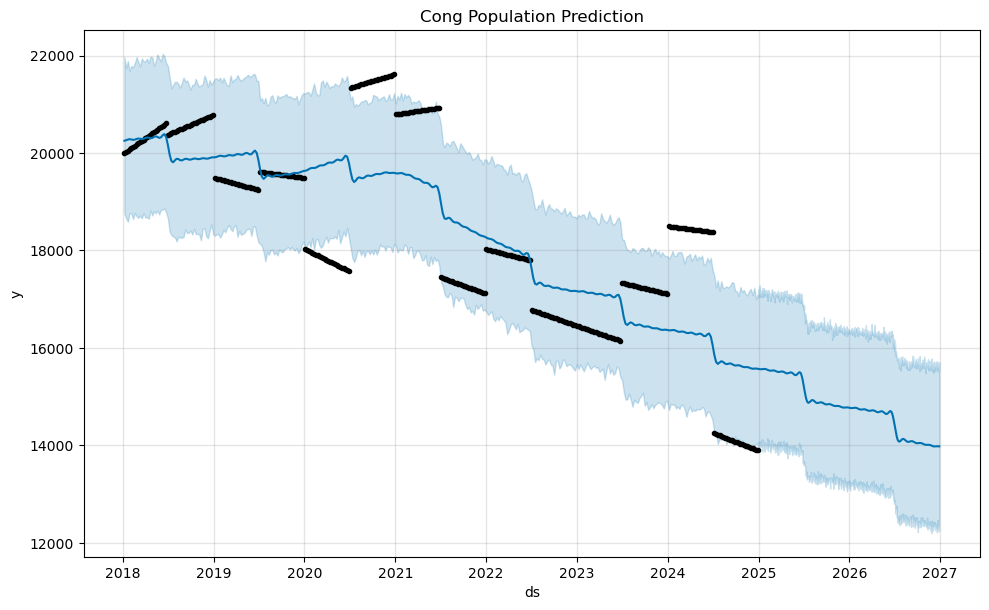

In [29]:
#Plot the prediction from 2024 to 2026
model_Cong.plot(prediction_Cong)
plt.title('Cong Population Prediction')
plt.show()

In [30]:
model_Cumeo.fit(data_prophet_Cumeo)

23:26:52 - cmdstanpy - INFO - Chain [1] start processing
23:26:52 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
prediction_Cumeo = model_Cumeo.make_future_dataframe(periods=730)
prediction_Cumeo = model_Cumeo.predict(prediction_Cumeo)
prediction_Cumeo[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2026-12-25,-424.406402,-4825.738282,4774.707066
1091,2026-12-26,-711.046739,-5217.742891,4169.521017
1092,2026-12-27,-1013.870285,-6033.702327,3747.966041
1093,2026-12-28,-1330.043878,-6097.701145,3514.256720
1094,2026-12-29,-1656.483344,-6789.685086,3010.894784


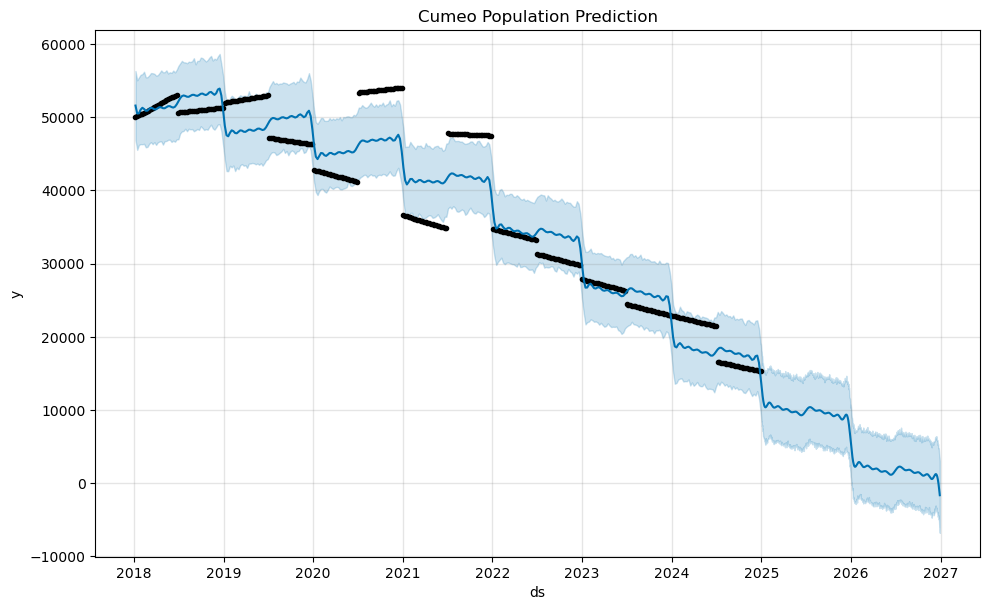

In [32]:
#Plot the prediction from 2024 to 2026
model_Cumeo.plot(prediction_Cumeo)
plt.title('Cumeo Population Prediction')
plt.show()

In [33]:
model_Catnho.fit(data_prophet_Catnho)

23:26:52 - cmdstanpy - INFO - Chain [1] start processing
23:26:52 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
prediction_Catnho = model_Catnho.make_future_dataframe(periods=730)
prediction_Catnho = model_Catnho.predict(prediction_Catnho)
prediction_Catnho[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2026-12-25,5904.235657,2969.303206,8884.913868
1091,2026-12-26,5656.981574,2843.782253,8556.810525
1092,2026-12-27,5395.840917,2356.259051,8296.406618
1093,2026-12-28,5123.192315,2134.775825,8302.000016
1094,2026-12-29,4841.626107,1750.573769,8126.388675


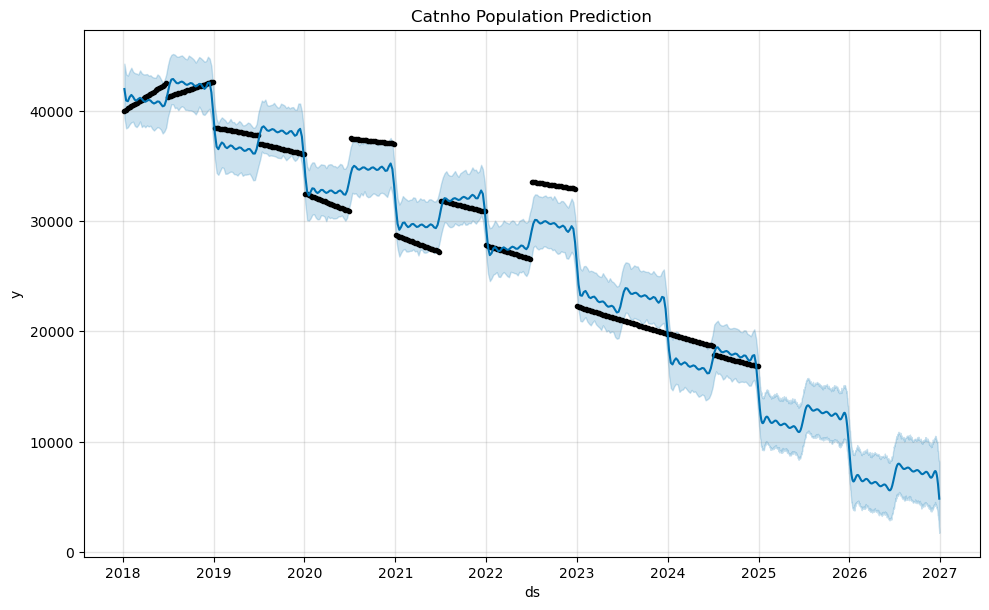

In [35]:
#Plot the prediction from 2024 to 2026
model_Catnho.plot(prediction_Catnho)
plt.title('Catnho Population Prediction')
plt.show()

In [36]:
model_Yenui.fit(data_prophet_Yenui)

23:26:52 - cmdstanpy - INFO - Chain [1] start processing
23:26:52 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
prediction_Yenui = model_Yenui.make_future_dataframe(periods=730)
prediction_Yenui = model_Yenui.predict(prediction_Yenui)
prediction_Yenui[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2026-12-25,9107.967087,6702.349675,11768.952117
1091,2026-12-26,9100.600424,6681.531426,11773.833159
1092,2026-12-27,9092.335289,6659.033699,11741.880105
1093,2026-12-28,9083.203709,6690.506190,11713.321208
1094,2026-12-29,9073.254071,6699.610349,11833.290486


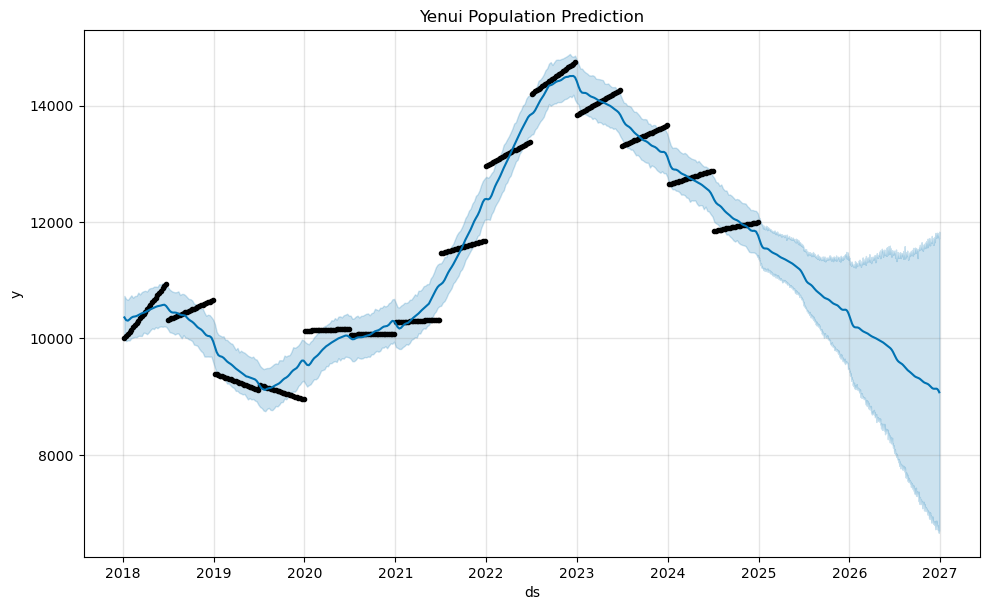

In [38]:
#Plot the prediction from 2024 to 2026
model_Yenui.plot(prediction_Yenui)
plt.title('Yenui Population Prediction')
plt.show()